## NLP Final Project for Misiniformation Detection

# Dataset:
1. Mbfc-API: Headline, News Origins, Ground Truth
2. Liars: Benchmark Datasets for Fake News Detection

# Model:
1. bert sequenceclassification
2. gpt2:
3. gpt2.5: sentence generation



In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
# import pacakage
import os
import pandas as pd




In [3]:
# Mount Google Drive
from google.colab import drive
gdrive_dir = '/content/drive/'
drive.mount(gdrive_dir, force_remount=True)


Mounted at /content/drive/


In [4]:
# Import the train data
# Define the path to the file
file_path = '/content/drive/My Drive/Colab Notebooks/NLP/final_project/data/train.tsv'
#file_path = './data/train.tsv'
# Load the data
train_data = pd.read_csv(file_path, delimiter='\t', header = None)
train_data = train_data.iloc[:, list(range(0,12))]
# Change the column names
train_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_data.shape[0]))
train_data.sample(10)


Number of training sentences: 10,240



,json,label,headline,subject,speaker,speaker_title,state_info,party_affiliation,barely true counts,false counts,half true counts,mostly true counts
4156,3983.json,half-true,Says Miami-Dade mayoral candidate Julio Robain...,candidates-biography,common-sense-now,NaN,Florida,none,0.0,0.0,1.0,0.0
4357,10926.json,mostly-true,U.S. Embassy Celebrates Americas Independence ...,"foreign-policy,religion",blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0
931,5914.json,true,On support for gay marriage.,gays-and-lesbians,mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0
3452,3913.json,half-true,Commercial buses in the United States have a s...,"public-safety,transportation",peter-pantuso,"President and CEO, American Bus Association","Washington, D.C.",none,0.0,0.0,1.0,0.0
2253,2382.json,mostly-true,Extending current tax rates would average more...,"taxes,abc-news-week",austan-goolsbee,chair of the Council of Economic Advisers,Illinois,democrat,0.0,1.0,0.0,3.0
7119,1757.json,mostly-true,"Numbers on illegal immigrants ""are down in ter...","homeland-security,immigration,abc-news-week",janet-napolitano,Secretary of Homeland Security,NaN,democrat,1.0,0.0,1.0,1.0
783,2212.json,true,Exporters are using a federal loophole to dece...,trade,hank-johnson,U.S. Congressman,Georgia,democrat,3.0,0.0,4.0,3.0
1804,5683.json,true,Says Barack Obama has played over 90 rounds of...,"economy,poverty,recreation",david-dewhurst,Lieutenant governor,Texas,republican,8.0,8.0,10.0,5.0
3015,10795.json,barely-true,Says the Clintons burst through their own self...,ethics,joe-scarborough,Host of a morning show on MSNBC,NaN,none,1.0,4.0,3.0,3.0
5256,7101.json,half-true,Says New Hampshire had the fourth-lowest unemp...,"jobs,taxes",maggie-hassan,Candidate for governor,New Hampshire,democrat,1.0,2.0,2.0,4.0


In [5]:
# Data Preprocessing
# To clean the data, some of the headline include the json and other features.
train_data = train_data[train_data['headline'].str.len() <= 512]


In [6]:
# Import the val data
# Define the path to the file
file_path = '/content/drive/My Drive/Colab Notebooks/NLP/final_project/data/valid.tsv'
#file_path = './data/valid.tsv'

# Load the data
val_data = pd.read_csv(file_path, delimiter='\t', header = None)
val_data = val_data.iloc[:, list(range(0,12))]
# Change the column names
val_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']

# Report the number of sentences.
print('Number of validation sentences: {:,}\n'.format(val_data.shape[0]))
val_data.sample(10)

Number of validation sentences: 1,284



,json,label,headline,subject,speaker,speaker_title,state_info,party_affiliation,barely true counts,false counts,half true counts,mostly true counts
494,3773.json,false,The health care price tag for childhood obesit...,public-health,nathan-deal,NaN,NaN,republican,9,5,11,11
1134,6943.json,mostly-true,Says Barack Obama has pension investments that...,"china,debates,pensions,taxes",mitt-romney,Former governor,Massachusetts,republican,34,32,58,33
177,2531.json,half-true,Says Lee Fisher wanted a $1.1 billion tax incr...,"economy,message-machine,stimulus,taxes",american-crossroads,NaN,NaN,republican,5,5,4,0
1151,5041.json,false,New Jersey taxpayers will now face the highest...,transportation,steve-lonegan,Conservative Activist,New Jersey,republican,1,2,2,0
931,3081.json,false,Despite the administration telling us (health ...,health-care,lamar-smith,Congressman,Texas,republican,2,5,1,3
72,7626.json,barely-true,"The people who were running the budget, in the...","state-finances,taxes",chris-christie,Governor of New Jersey,New Jersey,republican,10,17,27,19
738,4454.json,mostly-true,Hurricane Irene was the second-largest storm t...,"energy,weather",jersey-central-power-light,NaN,NaN,none,0,0,0,1
577,11343.json,false,"Daraprim is still underpriced, relative to its...","corrections-and-updates,health-care,public-health",martin-shkreli,"CEO, Turing Pharmaceuticals",NaN,none,0,1,0,0
644,337.json,barely-true,"In the Florida Republican primary, ""we got a v...",elections,john-mccain,U.S. senator,Arizona,republican,31,39,31,37
924,9510.json,mostly-true,Candidates for governor routinely disclose the...,"campaign-finance,elections",rick-scott,Governor,Florida,republican,28,23,38,34


In [7]:
# To clean the data, some of the headline include the json and other features.
val_data = val_data[val_data['headline'].str.len() <= 512]


In [8]:
# Get the unique value of label
unique_labels = train_data.label.unique()

print(unique_labels)

['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


In [9]:
# Get the unique value of label
unique_labels = val_data.label.unique()

print(unique_labels)

['barely-true' 'pants-fire' 'false' 'half-true' 'true' 'mostly-true']


In [10]:
# Convert the 'pants-fire' label into true '1'.
# Label value should be numerical
label_mapping = {
    'false': 0,
    'true': 1,
    'pants-fire': 0,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4
}

train_data['label'] = train_data['label'].map(label_mapping)
val_data['label'] = val_data['label'].map(label_mapping)

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_data.shape[0]))
print('Number of training sentences: {:,}\n'.format(val_data.shape[0]))
print(train_data.head())

Number of training sentences: 10,236

Number of training sentences: 1,284

         json  label                                           headline  \
0   2635.json      0  Says the Annies List political group supports ...   
1  10540.json      3  When did the decline of coal start? It started...   
2    324.json      4  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      0  Health care reform legislation is likely to ma...   
4   9028.json      3  The economic turnaround started at the end of ...   

                              subject         speaker         speaker_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   


In [11]:
# Replace NaN values in 'subject' with 'Not Specified'
train_data['subject'].fillna('Not Specified', inplace=True)
val_data['subject'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker' with 'Not Specified'
train_data['speaker'].fillna('Not Specified', inplace=True)
val_data['speaker'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker_title' with 'Not Specified'
train_data['speaker_title'].fillna('Not Specified', inplace=True)
val_data['speaker_title'].fillna('Not Specified', inplace=True)

# Concatenate the headline, subject, speaker and spearker_title
train_data['headline_full'] = (train_data['headline'] +
                               " Subject: " + train_data['subject'] + "." +
                               " Speaker: " + train_data['speaker'] + "." +
                               " Speaker title: " + train_data['speaker_title'] + ".")

val_data['headline_full'] = (val_data['headline'] +
                               " Subject: " + val_data['subject'] + "." +
                               " Speaker: " + val_data['speaker'] + "." +
                               " Speaker title: " + val_data['speaker_title'] + ".")



In [12]:
# Check for any NaN values in 'headline_full'
has_nan = train_data['headline_full'].isna().any()

print(f"Are there any NaN values in 'headline_full'? {has_nan}")

Are there any NaN values in 'headline_full'? False


In [13]:
# Get the lists of sentences and their labels.
train_headline = train_data.headline_full.values
train_labels = train_data.label.values

val_headline = val_data.headline_full.values
val_labels = val_data.label.values

print(f"Print out the the frist sentence of train_data: '{train_headline[0]}'")
print(f"Print out the the frist sentence of val_data: '{val_headline[0]}'")

Print out the the frist sentence of train_data: 'Says the Annies List political group supports third-trimester abortions on demand. Subject: abortion. Speaker: dwayne-bohac. Speaker title: State representative.'
Print out the the frist sentence of val_data: 'We have less Americans working now than in the 70s. Subject: economy,jobs. Speaker: vicky-hartzler. Speaker title: U.S. Representative.'


In [14]:
import requests
import json

# Base URL of the API
api_url = 'https://mbfcapi.herokuapp.com/api/v1/sources'

# Making a GET request to the base URL
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Print the response content to understand the API structure
    print(json.dumps(response.json(), indent=4))
else:
    print("Failed to retrieve data: Status Code", response.status_code)

Failed to retrieve data: Status Code 503


In [ ]:
import time
def fetch_data(url, max_retries=3, delay=5):
    """Fetch data from the API with retries on failure."""
    for attempt in range(max_retries):
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 503:
            print(f"Server unavailable, retrying in {delay} seconds... (Attempt {attempt + 1}/{max_retries})")
            time.sleep(delay)
        else:
            print(f"Failed to retrieve data: Status Code {response.status_code}")
            return None
    print("Max retries reached, unable to fetch data.")
    return None

# Endpoint URL
endpoint_url = 'https://mbfcapi.herokuapp.com/api/v1/sources'

# Fetching the data
data = fetch_data(endpoint_url)

if data:
    print(data)

Server unavailable, retrying in 5 seconds... (Attempt 1/3)
Server unavailable, retrying in 5 seconds... (Attempt 2/3)
Server unavailable, retrying in 5 seconds... (Attempt 3/3)
Max retries reached, unable to fetch data.


### Tokenization
1. BertTokenizer

In [15]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

Loading BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

In [16]:
# Print the original headline.
print(' Original: ', train_headline[0])

# Print the headline split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_headline[0]))

# Print the headline mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_headline[0])))

 Original:  Says the Annies List political group supports third-trimester abortions on demand. Subject: abortion. Speaker: dwayne-bohac. Speaker title: State representative.
Tokenized:  ['says', 'the', 'annie', '##s', 'list', 'political', 'group', 'supports', 'third', '-', 'trim', '##ester', 'abortion', '##s', 'on', 'demand', '.', 'subject', ':', 'abortion', '.', 'speaker', ':', 'd', '##way', '##ne', '-', 'bo', '##ha', '##c', '.', 'speaker', 'title', ':', 'state', 'representative', '.']
Token IDs:  [2758, 1996, 8194, 2015, 2862, 2576, 2177, 6753, 2353, 1011, 12241, 20367, 11324, 2015, 2006, 5157, 1012, 3395, 1024, 11324, 1012, 5882, 1024, 1040, 4576, 2638, 1011, 8945, 3270, 2278, 1012, 5882, 2516, 1024, 2110, 4387, 1012]


### Tokenize Dataset

In [ ]:
train_headline[15]

'In this last election in November, ... 63 percent of the American people chose not to vote, ... 80 percent of young people, (and) 75 percent of low-income workers chose not to vote. Subject: elections. Speaker: bernie-s. Speaker title: U.S. Senator.'

In [22]:
max_len = 0

# For every headline...
for sent in train_headline:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    train_input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    train_max_len = max(max_len, len(train_input_ids))

# For every headline...
for sent in val_headline:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    val_input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    val_max_len = max(max_len, len(val_input_ids))

print('Max sentence length for training set: ', train_max_len)
print('Max sentence length for training set: ', val_max_len)


Max sentence length for training set:  62
Max sentence length for training set:  45


We need to set the longest length of sentence to 256.


In [23]:
# Tokenize all of the headline and map the tokens to thier word IDs.
train_input_ids = []
train_attention_masks = []

# For every sentence...
for sent in train_headline:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    train_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_headline[0])
print('Token IDs:', train_input_ids[0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Says the Annies List political group supports third-trimester abortions on demand. Subject: abortion. Speaker: dwayne-bohac. Speaker title: State representative.
Token IDs: tensor([  101,  2758,  1996,  8194,  2015,  2862,  2576,  2177,  6753,  2353,
         1011, 12241, 20367, 11324,  2015,  2006,  5157,  1012,  3395,  1024,
        11324,  1012,  5882,  1024,  1040,  4576,  2638,  1011,  8945,  3270,
         2278,  1012,  5882,  2516,  1024,  2110,  4387,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 

In [27]:
print(f"The number of input tokens is: '{len(train_input_ids.unique())}'")

The number of input tokens is: '12405'


In [ ]:
# Tokenize all of the headline and map the tokens to thier word IDs.
val_input_ids = []
val_attention_masks = []

# For every sentence...
for sent in val_headline:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    val_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)
val_labels = torch.tensor(val_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', val_headline[0])
print('Token IDs:', val_input_ids[0])

Original:  We have less Americans working now than in the 70s. Subject: economy,jobs. Speaker: vicky-hartzler. Speaker title: U.S. Representative.
Token IDs: tensor([  101,  2057,  2031,  2625,  4841,  2551,  2085,  2084,  1999,  1996,
        17549,  1012,  3395,  1024,  4610,  1010,  5841,  1012,  5882,  1024,
        22845,  1011,  7530, 29247,  2099,  1012,  5882,  2516,  1024,  1057,
         1012,  1055,  1012,  4387,  1012,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0

In [ ]:
train_labels

tensor([0, 3, 4,  ..., 3, 0, 0])

## Training & Validation Dataloader



In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)


print('{:>5,} training samples'.format(train_data.shape[0]))
print('{:>5,} validation samples'.format(val_data.shape[0]))

10,236 training samples
1,284 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

## Train Classification Model

**Note**: For multi_label classification: we should set the 'problem_type' to 'single_label_classification'. This setting is more appropriate for multi-class classification tasks and ensure the model uses the cross_entropy loss rather than binary_cross_entropy_with_logits.
The problem_type "multi_label_classification". This configuration is typically used for scenarios where each example might belong to multiple classes simultaneously, and it's often associated with binary cross-entropy loss functions.

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-large-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--5 for classification.
    problem_type="single_label_classification",  # Set the problem type to single-label classification
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,

In [ ]:
print(model.config)

BertConfig {
  "_name_or_path": "bert-large-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



## Optimizer & Learning Rate Schedule

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Example: Running a single batch through the model
batch = next(iter(train_dataloader))
b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
loss = outputs.loss
logits = outputs.logits

print("Input IDs shape:", b_input_ids.shape)
print("Attention Mask shape:", b_input_mask.shape)
print("Labels shape:", b_labels.shape)
print("Logits shape:", logits.shape)
print("Loss:", loss)

Input IDs shape: torch.Size([32, 256])
Attention Mask shape: torch.Size([32, 256])
Labels shape: torch.Size([32])
Logits shape: torch.Size([32, 5])
Loss: tensor(1.9265, device='cuda:0', grad_fn=<NllLossBackward0>)


## Training Loop

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# Define the loss function
import torch.nn as nn
loss_function = nn.CrossEntropyLoss()

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clip the norm of the gradients to 1.0.

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    320.    Elapsed: 0:00:41.
  Batch    80  of    320.    Elapsed: 0:01:21.
  Batch   120  of    320.    Elapsed: 0:02:01.
  Batch   160  of    320.    Elapsed: 0:02:41.
  Batch   200  of    320.    Elapsed: 0:03:22.
  Batch   240  of    320.    Elapsed: 0:04:02.
  Batch   280  of    320.    Elapsed: 0:04:42.

  Average training loss: 1.60
  Training epcoh took: 0:05:23

Running Validation...
  Accuracy: 0.32
  Validation Loss: 1.55
  Validation took: 0:00:13

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    320.    Elapsed: 0:00:40.
  Batch    80  of    320.    Elapsed: 0:01:21.
  Batch   120  of    320.    Elapsed: 0:02:01.
  Batch   160  of    320.    Elapsed: 0:02:41.
  Batch   200  of    320.    Elapsed: 0:03:22.
  Batch   240  of    320.    Elapsed: 0:04:02.
  Batch   280  of    320.    Elapsed: 0:04:42.

  Average training loss: 1.53
  Training epcoh took: 0:05:22

Running Validation...
  Accuracy: 0.33
 

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.60,1.55,0.32,0:05:23,0:00:13
2,1.53,1.49,0.33,0:05:22,0:00:13
3,1.44,1.49,0.33,0:05:22,0:00:13
4,1.30,1.51,0.35,0:05:22,0:00:13


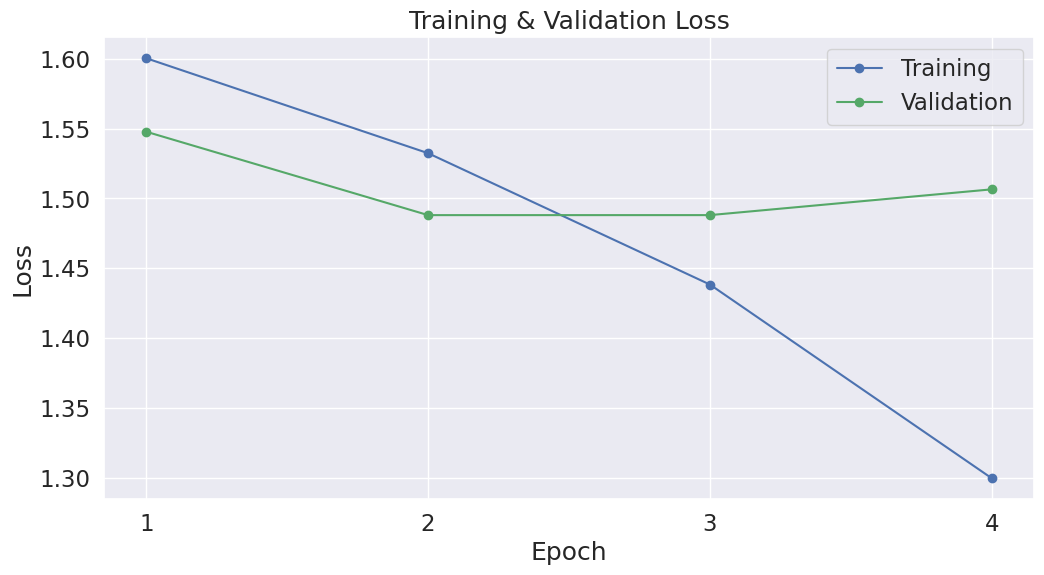

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

### Evaluate on Testset:


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/NLP/final_project/data/test.tsv'
# Load the data
test_data = pd.read_csv(file_path, delimiter='\t', header = None)
test_data = test_data.iloc[:, list(range(0,12))]
# Change the column names
test_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(test_data.shape[0]))
test_data.sample(10)


Number of training sentences: 1,267



,json,label,headline,subject,speaker,speaker_title,state_info,party_affiliation,barely true counts,false counts,half true counts,mostly true counts
1055,7685.json,half-true,"Right now, if Rhode Island police come across ...","crime,criminal-justice,guns,legal-issues",linda-finn,landscape designer,Rhode Island,democrat,0,0,1,2
749,6774.json,mostly-true,"Bill Nelson voted to confirm Sonia Sotomayor, ...","guns,supreme-court",national-rifle-association,NaN,NaN,none,3,5,1,5
194,10269.json,barely-true,The U.S. Constitution owes its notion of democ...,"diversity,history",facebook-posts,Social media posting,NaN,none,14,18,15,11
965,512.json,true,John McCain decided to stand with George Bush ...,bush-administration,barack-obama,President,Illinois,democrat,70,71,160,163
763,9333.json,half-true,"When you read the Koran, it talks about dont t...",islam,sean-hannity,Radio/TV host,NaN,none,3,5,3,2
170,6060.json,barely-true,We spend in tax loopholes annually $1.1 trilli...,taxes,jeanne-shaheen,Senator,New Hampshire,democrat,3,0,4,2
314,11351.json,mostly-true,A voucher school that closed after 9 days this...,state-budget,jennifer-shilling,"State Assembly member, 95th District",Wisconsin,democrat,1,1,0,2
648,10883.json,false,"Once a woman enters into the sex trade, her av...","children,crime,public-health,public-safety,rec...",rebecca-quigley,"host, ""State of the State.""",Rhode Island,none,0,1,0,0
854,4841.json,mostly-true,"Says she brought together business, labor and ...",health-care,eileen-brady,NaN,NaN,democrat,0,2,0,1
929,7877.json,mostly-true,Black children constitute 18 percent of the na...,"civil-rights,education",john-lewis,Congressman,Georgia,democrat,0,1,2,1


In [ ]:
# Convert the 'pants-fire' label into true '1'.
# Label value should be numerical
label_mapping = {
    'false': 0,
    'true': 1,
    'pants-fire': 0,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4
}

test_data['label'] = test_data['label'].map(label_mapping)

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test_data.shape[0]))


Number of test sentences: 1,267



In [ ]:
# Replace NaN values in 'subject' with 'Not Specified'
test_data['subject'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker' with 'Not Specified'
test_data['speaker'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker_title' with 'Not Specified'
test_data['speaker_title'].fillna('Not Specified', inplace=True)

# Concatenate the headline, subject, speaker and spearker_title
test_data['headline_full'] = (test_data['headline'] +
                               " Subject: " + test_data['subject'] + "." +
                               " Speaker: " + test_data['speaker'] + "." +
                               " Speaker title: " + test_data['speaker_title'] + ".")


In [ ]:
# Create sentence and label lists
sentences = test_data.headline_full.values
labels = test_data.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,267 test sentences...
    DONE.


In [ ]:
# Convert logits to class labels
import numpy as np
# Convert logits to class labels
y_pred = [np.argmax(F.softmax(torch.from_numpy(batch_logits), dim=1).numpy(), axis=1) for batch_logits in predictions]
y_pred = np.concatenate(y_pred, axis=0)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = labels
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy for each class
class_accuracies = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracies):
    print(f"Accuracy of Class {i}: {acc}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy}")

Accuracy of Class 0: 0.5542521994134897
Accuracy of Class 1: 0.3269230769230769
Accuracy of Class 2: 0.14622641509433962
Accuracy of Class 3: 0.2792452830188679
Accuracy of Class 4: 0.2946058091286307
Overall Accuracy: 0.34175217048145223
